# Part II - Exploring San Francisco Bay Area’s Bike Share Data
## by (George Mbaria)



## Investigation Overview


> Implemented in 2013, Ford GoBike is the first bike-sharing system introduced in the US West Coast. Its 540 stations and 7,000 bikes sprawl across five cities in San Francisco Bay Area. A docked bike can be checked out at any station and must be returned to a station when the trip is complete. As an avid GoBike user and a data fanatic, I am excited to explore, the trip data that has been collected in February 2019.
> In this investigation, I wanted to look at how the Ford GoBikes duration time related to the ages, member genders, weekdays , and the user_type in a manner that could be used to predict bigger profit margins, when could be the best days to set discounts, and who the target client in the San Fransisco Bay Area.
>The main fetures I focused on was on the duration in seconds, the member genders, the ages that I generated from the members birth year, the start weekday, and the user type.



## Dataset Overview
> The dataset consisted of 183,412 rows with 16 columns. There are 9 variables that were numeric in nature and 7 that were categorical. Besides the start_time and end_time being categorized as strings instead the datetime dtypes, all the other categorical variables (start_station_name, end_station_name, member_gender, and bike_share_for_all_trips) were nominal variables.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
fordgobike = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# Lets make a copy of the dataframe
bike_df = fordgobike.copy()
bike_df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
116871,315,2019-02-12 07:03:41.0400,2019-02-12 07:08:56.2300,50.0,2nd St at Townsend St,37.780526,-122.390288,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,5253,Subscriber,1979.0,Male,No
69862,244,2019-02-19 18:56:03.9830,2019-02-19 19:00:08.4290,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,90.0,Townsend St at 7th St,37.771058,-122.402717,4761,Subscriber,NaN,NaN,No
78284,386,2019-02-18 20:09:07.2350,2019-02-18 20:15:33.2860,127.0,Valencia St at 21st St,37.756708,-122.421025,113.0,Franklin Square,37.764555,-122.410345,4996,Subscriber,1988.0,Male,No
19905,391,2019-02-26 15:07:45.6360,2019-02-26 15:14:17.0550,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,50.0,2nd St at Townsend St,37.780526,-122.390288,6434,Subscriber,1986.0,Male,No
96025,418,2019-02-15 11:46:00.9540,2019-02-15 11:52:59.8790,139.0,Garfield Square (25th St at Harrison St),37.751017,-122.411901,109.0,17th St at Valencia St,37.763316,-122.421904,6477,Customer,1981.0,Female,No


In [4]:
#Lets drop the duplicates  
bike_df['start_time'] = pd.to_datetime(bike_df['start_time'])
bike_df['end_time'] = pd.to_datetime(bike_df['end_time'])
stations = bike_df[['start_station_id', 'start_station_name']].drop_duplicates()
station_name_count = stations[['start_station_id', 'start_station_name']].groupby('start_station_id').agg('count')

station_name_dup = station_name_count[station_name_count['start_station_name'] > 1]
station_name_dup.shape

(0, 1)

In [5]:
# Now onto renaming the collumns 
bike_df.rename(columns = {'start_time':'start_timestamp', 'end_time':'end_timestamp'}, inplace = True)
bike_df['start_date'] = bike_df['start_timestamp'].dt.date
bike_df['start_time'] = bike_df['start_timestamp'].dt.time
bike_df['start_weekday'] = bike_df['start_timestamp'].dt.weekday
bike_df['end_date'] = bike_df['end_timestamp'].dt.date
bike_df['end_time'] = bike_df['end_timestamp'].dt.time
bike_df['end_weekday'] = bike_df['end_timestamp'].dt.weekday
bike_df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [6]:
# Lets fill the null values in the member_df
bike_df['member_gender'] =  bike_df['member_gender'].fillna('Other')

# Now onto changing the start_date and end_date dtype to a datetime dtype
bike_df['start_date'] = pd.to_datetime(bike_df['start_date'])
bike_df['end_date'] = pd.to_datetime(bike_df['end_date'])

In [7]:
stations_start = bike_df[bike_df['start_station_id'] != -1][['start_station_id', 'start_station_name', 
                                                             'start_station_latitude', 'start_station_longitude']]
stations_end = bike_df[bike_df['end_station_id'] != -1][['end_station_id', 'end_station_name', 
                                                             'end_station_latitude', 'end_station_longitude']]
stations_start.rename(columns = {'start_station_id':'station_id', 'start_station_name':'station_name', 
                                 'start_station_latitude': 'station_latitude', 
                                 'start_station_longitude':'station_longitude'}, inplace = True)
stations_end.rename(columns = {'end_station_id':'station_id', 'end_station_name':'station_name', 'end_station_latitude': 'station_latitude', 
                               'end_station_longitude':'station_longitude'}, inplace = True)
stations_df = stations_start.append(stations_end)

In [8]:
# Onto changing the start_weekday and end_weekday from values to days of the week.

days_of_week = bike_df['start_date'].dt.day_name()

bike_df['start_weekday'] = bike_df['start_date'].dt.day_name()
bike_df['end_weekday'] = bike_df['end_date'].dt.day_name()
bike_df.start_weekday.unique()

array(['Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday',
       'Friday'], dtype=object)

In [9]:
# convert start_weekday and end_weekday into ordered categorical types
ordinal_var_dict = {'start_weekday': ['Sunday','Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday'],
                    'end_weekday': ['Sunday','Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    bike_df[var] = bike_df[var].astype(ordered_var)

In [10]:
# Since we have the member_birth_years, let's find their ages for easy visualization.

# First let's drop the unique birthvalue -9223372036854775808 which must have been filled in mistakenly.

bike_df = bike_df[bike_df.member_birth_year !=-9223372036854775808]

col = bike_df['member_birth_year']

bike_df['age'] =2022 -  bike_df['member_birth_year']
    
    

In [11]:
# Lets code our scatter plot function that we used earlier in the exploration .

def myCountPlot(df,xVar):
    
    #set plot dimensions
    plt.figure (figsize = [8,8])
    
    #Set color
    base_color = sb.color_palette()[0]
    #plot
    sb.countplot(data=df,x=xVar,color=base_color);
    
    #Add title and format it
    plt.title(f'''Distribution of {xVar}'''.title(), fontsize=14, weight='bold')
    
    #Add x label and format it
    plt.xlabel(xVar.title(), fontsize=10, weight='bold')
    
    #Add y label and format it
    plt.ylabel('Frequency'.title(), fontsize=10, weight='bold')


## Distribution Of the Start_Weekday 

> Thursday signifies a large influx of bikes used. Therefore, it seems a lot of people in the Bay region use the bikes more often on Thursdays than any other day of the week. Saturdays and Sundays having the least bike usage. The weekdays dominated as the most busiest than the weekends This should be so since the main objective of the project was to try and make the bike share utilized more than vehicles commuting from one point to another in the San Francisco Bay Area.



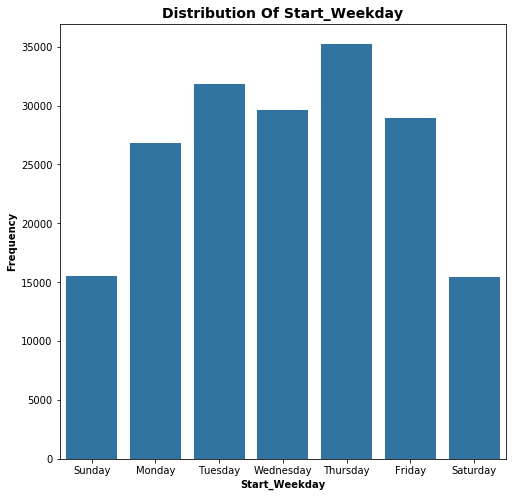

In [12]:
#Now lets plot the distribution of the Start_Weekday 

myCountPlot(bike_df, "start_weekday" )


## Distribution Of the Start_Weekday¶
> Just like the start_weekday thursday remains the busiest of all the weekdays.The weekdays are more dominant than the weekends. 

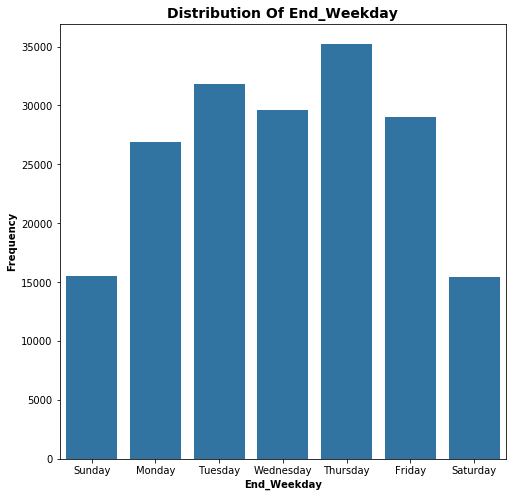

In [13]:
#Now lets plot the distribution of th end_Weekday

myCountPlot(bike_df, "end_weekday" )

## Age Againist Member Gender


> From the boxplot below we can deduct that the genders both male and female together with the others are mostly 20-60 years old. The average minimum age of the member genders in both male and female is 20 years. The maximum ages are ranging at 56-60 years, and the median of the ages are ranging at 30-39 years. There are a number of outliers indicating some bike riders who are over 100 years and they must be quite elderly. The big reason again is due to human error while filling in the ages or the rider decided not to provide his/her year of birth.

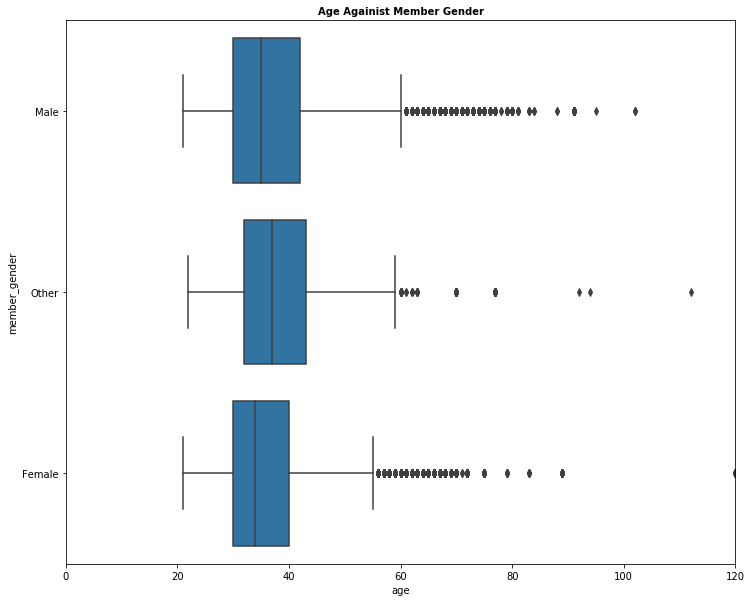

In [14]:
plt.figure(figsize=(12,10))
plt.xlim([0, 120])
plt.title( 'Age Againist Member Gender'.title(), fontsize=10, weight='bold')
base_color = sb.color_palette()[0]
sb.boxplot(data= bike_df, y='member_gender', x='age', color=base_color);

## Age, Averange Duration in Seconds, and Gender Relationship

> The adaptive point plot that we had plotted earlier in the bivariate visualization showed the weekends having a greater average duration time. Introducing the genders in the plot, the females on Sunday have the highest average duration time of 1000 sec. followed by the females on Saturday as compared to the male gender. The males on Tuesday have the lowest duration time followed by the females.  

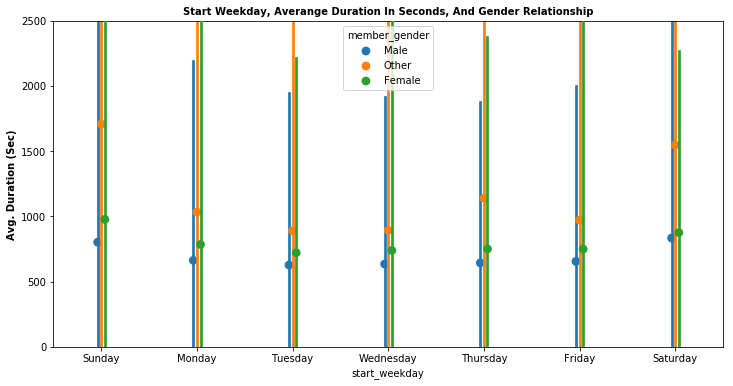

In [15]:
# Lets plot an adaptive point plot 

plt.figure(figsize=(12,6))
sb.pointplot(data= bike_df, x = 'start_weekday', y = 'duration_sec', hue = 'member_gender',
             ci='sd', linestyles = "", dodge = True); 
plt.title( 'Start Weekday, Averange Duration in Seconds, and Gender Relationship'.title(), fontsize=10, weight='bold')
plt.ylim([0, 2500])
plt.ylabel('Avg. Duration (sec)'.title(), fontsize=10, weight='bold');


## Start Weekday, User Type,  Duration in Seconds, and Gender Relationship

> According to the ploted boxplot, the female customers on Sunday had the highest duration with over 2000 seconds. The female customers also had the highest median and the highest 1st and 3rd quartiles. The subscribers seem to be maintaining the same medians across all genders with a slight rise on the male subscribers on the Saturday.The female gender once again has the highest maximum duration in seconds on Sunday and the male gender on Saturday in the subscribers row. 

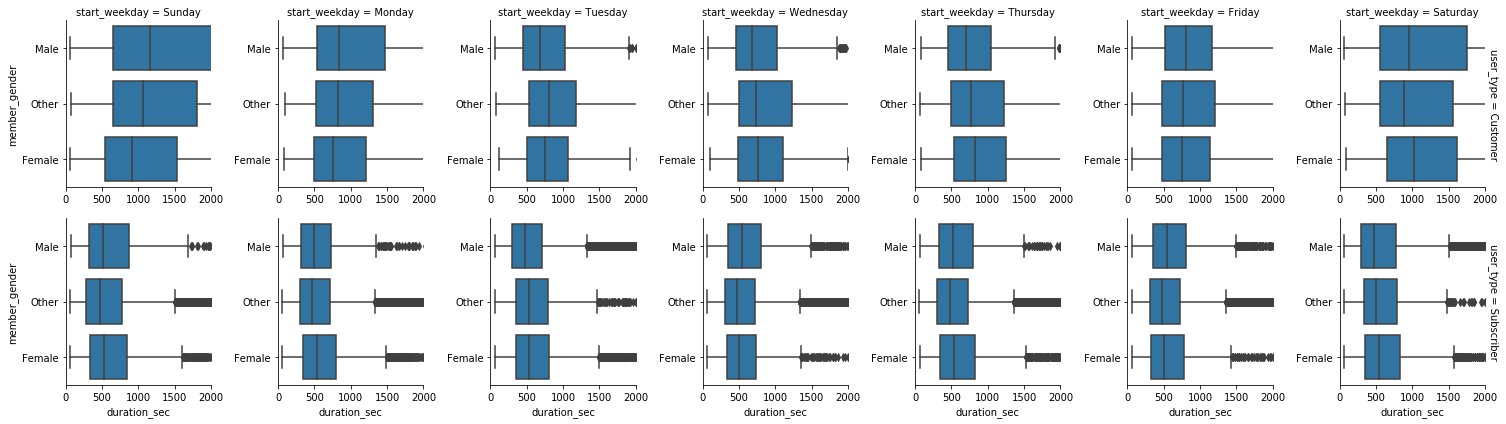

In [17]:
g = sb.FacetGrid(data = bike_df, col = 'start_weekday', row = 'user_type', margin_titles = True)
plt.xlim([0, 2000])
g.map(sb.boxplot, 'duration_sec', 'member_gender');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Exploring_San_Francisco_Bay_Area’s_Bike_Share_Data_Part_2.ipynb --to slides --post serve --no-input --no-prompt

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 